In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor as MyRandomForestRegressor
%matplotlib inline

In [12]:
boston = load_boston()
X = boston.data
y = boston.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)

In [14]:
%%time
depths = []
scores = []

for depth in range(1, 12):
    DTR = DecisionTreeRegressor(max_depth=depth)
    depths.append(depth)
    DTR.fit(X_train, y_train)
    scores.append(DTR.score(X_test, y_test))    

CPU times: user 19 ms, sys: 3.88 ms, total: 22.9 ms
Wall time: 22.7 ms


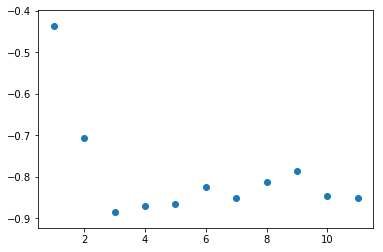

In [15]:
plt.scatter(depths, [-1 * score for score in scores])

In [16]:
%%time
depths = []
scores = []

MyDTR = MyDecisionTreeRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyDTR.fit(X_train, y_train, max_depth=depth)
    scores.append(MyDTR.score(X_test, y_test))  

CPU times: user 50.2 s, sys: 326 µs, total: 50.2 s
Wall time: 50.2 s


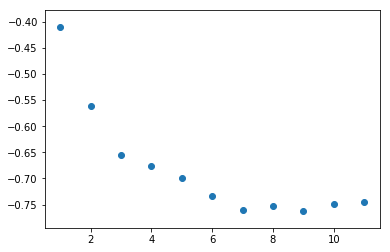

In [17]:
plt.scatter(depths, [-1 * score for score in scores])

In [18]:
%%time
depths = []
scores = []

for depth in range(1, 12):
    RFR = RandomForestRegressor(max_depth=depth, n_estimators=50)
    depths.append(depth)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test)) 

CPU times: user 888 ms, sys: 76 ms, total: 964 ms
Wall time: 873 ms


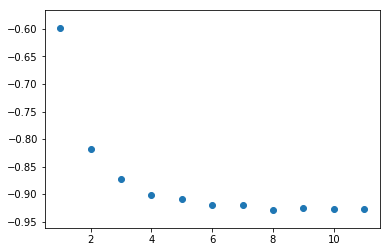

In [19]:
plt.scatter(depths, [-1 * score for score in scores])

In [ ]:
%%time
depths = []
scores = []

MyRFR = MyRandomForestRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyRFR.fit(X_train, y_train, max_depth=depth, n_estimators=50)
    scores.append(MyRFR.score(X_test, y_test)) 

In [ ]:
plt.scatter(depths, [-1 * score for score in scores])